In [1]:
import numpy as np
import matplotlib.pylab as plt

import pandas as pd
from pandas.plotting import scatter_matrix

import statsmodels.api as sm

from scipy.stats import t, norm

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We examine the [Survey of Consumer Finances (SCF)](https://www.federalreserve.gov/econres/scfindex.htm), a nationally representative sample that contains extensive information on assets, liabilities, income, and demographic characteristics of those sampled (potential U.S. customers). We study a random sample of 500 households with positive incomes that were interviewed in the 2004 survey. We initially consider the subset of $n = 275$ families that purchased term life insurance.

We want to determine family characteristics that influence the **amount of insurance** purchased. For term life insurance, the quantity of insurance is measured by the policy **FACE**, the amount that the company will pay in the event of the death of the named insured (death benefit). Characteristics that will turn out to be important include annual **INCOME**; the number of years of **EDUCATION** of the survey respondent, and the number of household members, **NUMHH**.

See [http://research.bus.wisc.edu/RegActuariesLinks](http://research.bus.wisc.edu/RegActuariesLinks) for the data.

In [3]:
survey_data = pd.read_csv("drive/MyDrive/UCLA Teaching/Math 178C/TermLife.csv")

In [4]:
survey_data

,GENDER,AGE,MARSTAT,EDUCATION,ETHNICITY,SMARSTAT,SGENDER,SAGE,SEDUCATION,NUMHH,INCOME,TOTINCOME,CHARITY,FACE,FACECVLIFEPOLICIES,CASHCVLIFEPOLICIES,BORROWCVLIFEPOL,NETVALUE
0,1,30,1,16,3,2,2,27,16,3,43000,43000,0,20000,0,0,0,0
1,1,50,1,9,3,1,2,47,8,3,12000,0,0,130000,0,0,0,0
2,1,39,1,16,1,2,2,38,16,5,120000,90000,500,1500000,0,0,0,0
3,1,43,1,17,1,1,2,35,14,4,40000,40000,0,50000,75000,0,5,0
4,1,61,1,15,1,2,2,59,12,2,25000,1020000,500,0,7000000,300000,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,63,1,16,1,2,2,55,15,4,66000,160000,4000,200000,600000,6000,5,0
496,1,47,1,12,1,2,2,42,12,3,80000,55000,3000,530000,0,0,0,0
497,1,68,0,4,1,0,0,0,0,1,5600,0,0,0,0,0,0,0
498,1,26,2,12,2,3,2,26,12,4,20000,0,0,0,40000,10000,5,0


In [5]:
data = survey_data[survey_data['FACE'] > 0]

In [6]:
data_regression = data[['FACE','INCOME','EDUCATION','NUMHH']]

In [7]:
data_regression

,FACE,INCOME,EDUCATION,NUMHH
0,20000,43000,16,3
1,130000,12000,9,3
2,1500000,120000,16,5
3,50000,40000,17,4
5,220000,28000,11,4
...,...,...,...,...
491,600000,244000,17,1
494,40000,35000,16,3
495,200000,66000,16,4
496,530000,80000,12,3


In [8]:
data_regression.describe().T

,count,mean,std,min,25%,50%,75%,max
FACE,275.0,747581.454545,1.674362e+06,800.0,50000.0,150000.0,590000.0,14000000.0
INCOME,275.0,208974.618182,8.240098e+05,260.0,38000.0,65000.0,120000.0,10000000.0
EDUCATION,275.0,14.523636,2.549221e+00,2.0,13.0,16.0,16.5,17.0
NUMHH,275.0,2.960000,1.492756e+00,1.0,2.0,3.0,4.0,9.0


In [9]:
summary = data_regression.describe().T
summary.insert(2, 'median', data_regression.median())
summary

,count,mean,median,std,min,25%,50%,75%,max
FACE,275.0,747581.454545,150000.0,1.674362e+06,800.0,50000.0,150000.0,590000.0,14000000.0
INCOME,275.0,208974.618182,65000.0,8.240098e+05,260.0,38000.0,65000.0,120000.0,10000000.0
EDUCATION,275.0,14.523636,16.0,2.549221e+00,2.0,13.0,16.0,16.5,17.0
NUMHH,275.0,2.960000,3.0,1.492756e+00,1.0,2.0,3.0,4.0,9.0


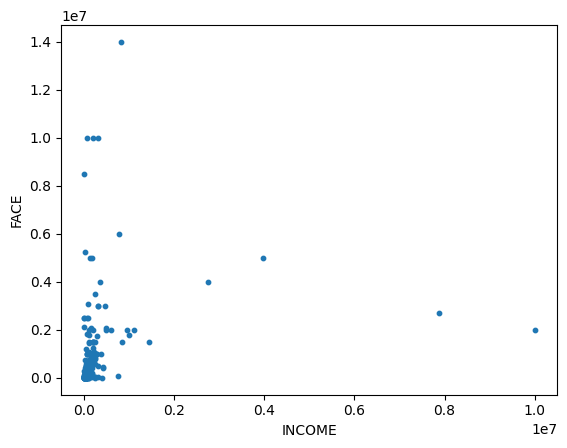

In [10]:
plt.scatter(data_regression['INCOME'], data_regression['FACE'], s = 10)
plt.xlabel('INCOME')
plt.ylabel('FACE')
plt.show()

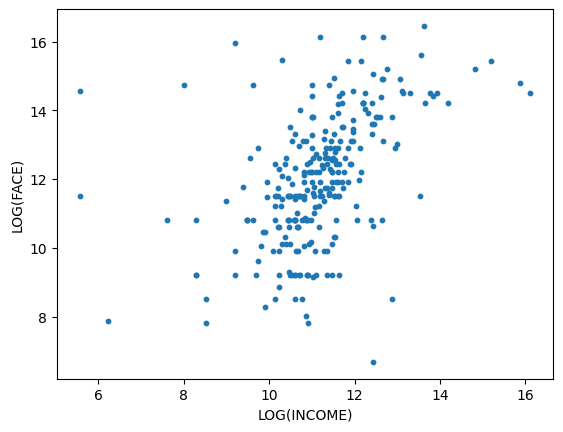

In [11]:
plt.scatter(np.log(data_regression['INCOME']), np.log(data_regression['FACE']), s = 10)
plt.xlabel('LOG(INCOME)')
plt.ylabel('LOG(FACE)')
plt.show()

In [12]:
data_regression.insert(2, 'LOGINCOME', np.log(data_regression['INCOME']))

In [13]:
data_regression.insert(1, 'LOGFACE', np.log(data_regression['FACE']))

In [14]:
data_regression

,FACE,LOGFACE,INCOME,LOGINCOME,EDUCATION,NUMHH
0,20000,9.903488,43000,10.668955,16,3
1,130000,11.775290,12000,9.392662,9,3
2,1500000,14.220976,120000,11.695247,16,5
3,50000,10.819778,40000,10.596635,17,4
5,220000,12.301383,28000,10.239960,11,4
...,...,...,...,...,...,...
491,600000,13.304685,244000,12.404924,17,1
494,40000,10.596635,35000,10.463103,16,3
495,200000,12.206073,66000,11.097410,16,4
496,530000,13.180632,80000,11.289782,12,3


In [15]:
data_regression.describe().T

,count,mean,std,min,25%,50%,75%,max
FACE,275.0,747581.454545,1.674362e+06,800.000000,50000.000000,150000.000000,590000.000000,1.400000e+07
LOGFACE,275.0,11.990293,1.870728e+00,6.684612,10.819778,11.918391,13.287734,1.645457e+01
INCOME,275.0,208974.618182,8.240098e+05,260.000000,38000.000000,65000.000000,120000.000000,1.000000e+07
LOGINCOME,275.0,11.149097,1.295028e+00,5.560682,10.545341,11.082143,11.695247,1.611810e+01
EDUCATION,275.0,14.523636,2.549221e+00,2.000000,13.000000,16.000000,16.500000,1.700000e+01
NUMHH,275.0,2.960000,1.492756e+00,1.000000,2.000000,3.000000,4.000000,9.000000e+00


In [16]:
summary = data_regression.describe().T
summary.insert(2, 'median', data_regression.median())
summary

,count,mean,median,std,min,25%,50%,75%,max
FACE,275.0,747581.454545,150000.000000,1.674362e+06,800.000000,50000.000000,150000.000000,590000.000000,1.400000e+07
LOGFACE,275.0,11.990293,11.918391,1.870728e+00,6.684612,10.819778,11.918391,13.287734,1.645457e+01
INCOME,275.0,208974.618182,65000.000000,8.240098e+05,260.000000,38000.000000,65000.000000,120000.000000,1.000000e+07
LOGINCOME,275.0,11.149097,11.082143,1.295028e+00,5.560682,10.545341,11.082143,11.695247,1.611810e+01
EDUCATION,275.0,14.523636,16.000000,2.549221e+00,2.000000,13.000000,16.000000,16.500000,1.700000e+01
NUMHH,275.0,2.960000,3.000000,1.492756e+00,1.000000,2.000000,3.000000,4.000000,9.000000e+00


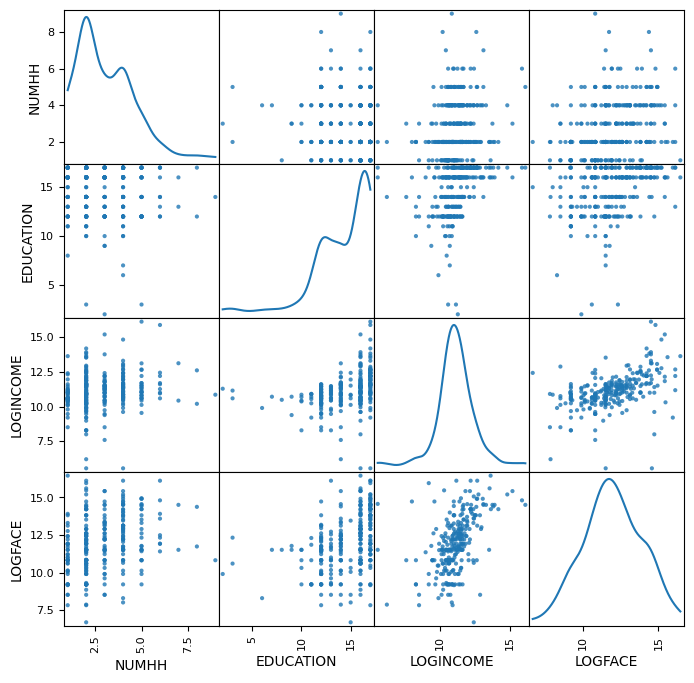

In [17]:
scatter_matrix(data_regression[['NUMHH','EDUCATION','LOGINCOME','LOGFACE']], alpha=0.8, figsize=(8, 8), diagonal='kde')
plt.show()

In [18]:
data_regression[['NUMHH','EDUCATION','LOGINCOME','LOGFACE']].corr()

,NUMHH,EDUCATION,LOGINCOME,LOGFACE
NUMHH,1.000000,-0.063529,0.179335,0.287611
EDUCATION,-0.063529,1.000000,0.342704,0.382849
LOGINCOME,0.179335,0.342704,1.000000,0.481843
LOGFACE,0.287611,0.382849,0.481843,1.000000


In [19]:
X = pd.DataFrame({'intercept': np.ones(data_regression['EDUCATION'].shape[0]),
                  'EDUCATION': data_regression['EDUCATION'],
                  'NUMHH': data_regression['NUMHH'],
                  'LOGINCOME': data_regression['LOGINCOME']})

In [20]:
X

,intercept,EDUCATION,NUMHH,LOGINCOME
0,1.0,16,3,10.668955
1,1.0,9,3,9.392662
2,1.0,16,5,11.695247
3,1.0,17,4,10.596635
5,1.0,11,4,10.239960
...,...,...,...,...
491,1.0,17,1,12.404924
494,1.0,16,3,10.463103
495,1.0,16,4,11.097410
496,1.0,12,3,11.289782


In [21]:
y = data_regression['LOGFACE']

In [22]:
y

,LOGFACE
0,9.903488
1,11.775290
2,14.220976
3,10.819778
5,12.301383
...,...
491,13.304685
494,10.596635
495,12.206073
496,13.180632


In [23]:
model = sm.OLS(y, X)
results = model.fit()

In [24]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                LOGFACE   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     47.07
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           1.62e-24
Time:                        22:16:56   Log-Likelihood:                -504.28
No. Observations:                 275   AIC:                             1017.
Df Residuals:                     271   BIC:                             1031.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5841      0.846      3.053      0.0

Compute Total Sum of Squares (TSS), Residual Sum of Squares (RSS), Explained Sum of Squares (ESS):

In [25]:
TSS = ((y-y.mean())**2).sum()
TSS

np.float64(958.8963471585173)

In [26]:
RSS = (results.resid**2).sum()
RSS

np.float64(630.4289697360115)

In [27]:
ESS = ((results.fittedvalues-y.mean())**2).sum()
ESS

np.float64(328.4673774225067)

Coefficient of Determination $R^2$ (R-squared):

In [28]:
ESS/TSS

np.float64(0.34254732369754975)

Coefficient of Determination adjusted for degrees of freedom $R^2_a$ (Adj. R-squared):

In [29]:
s = results.resid.std()*np.sqrt(275-1)/np.sqrt(275-4)
s

np.float64(1.525223315251735)

In [30]:
s_y = y.std()
s_y

1.8707275870521851

In [31]:
1-s**2/(s_y)**2

np.float64(0.33526924979014217)

Compute $(X^\top X)^{-1}$:

In [32]:
np.dot(X.T,X)

array([[  275.        ,  3994.        ,   814.        ,  3066.00164044],
       [ 3994.        , 59788.        , 11756.        , 44839.48867018],
       [  814.        , 11756.        ,  3020.        ,  9170.35632669],
       [ 3066.00164044, 44839.48867018,  9170.35632669, 34642.67386182]])

In [33]:
print(np.linalg.inv(np.dot(X.T,X)))

[[ 3.07974627e-01 -4.63266529e-03 -2.13061182e-03 -2.06966096e-02]
 [-4.63266529e-03  6.48200708e-04  1.42953134e-04 -4.66827709e-04]
 [-2.13061182e-03  1.42953134e-04  1.72379262e-03 -4.52773325e-04]
 [-2.06966096e-02 -4.66827709e-04 -4.52773325e-04  2.58468062e-03]]


Compute $\text{SE}(\hat{\beta}_3)$:

In [34]:
s * np.sqrt(np.linalg.inv(np.dot(X.T,X))[3,3])

np.float64(0.07754197859536119)

Compute $t(\hat\beta_3)$:

In [35]:
results.params.iloc[3]

np.float64(0.493532279732717)

In [36]:
results.params.iloc[3]/(s * np.sqrt(np.linalg.inv(np.dot(X.T,X))[3,3]))

np.float64(6.36471094332176)